In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [9]:
df["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [10]:
df["target"].unique()

array([1, 0])

Clearly, this is a classification problem, with the target variable having values '0' and '1'

Checking correlation between columns

In [11]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


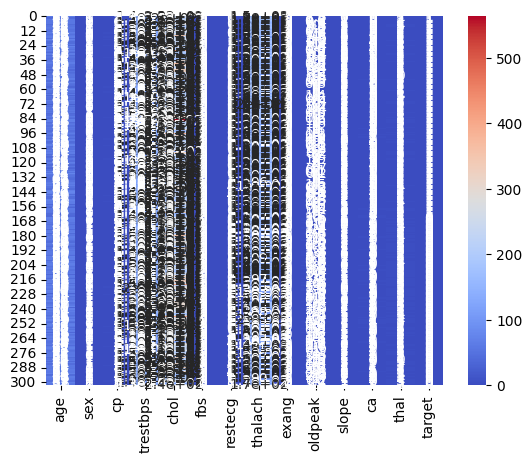

In [12]:
sns.heatmap(df, annot=True, cmap='coolwarm')
plt.show()

#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis (EDA)

First, analysing the target variable:

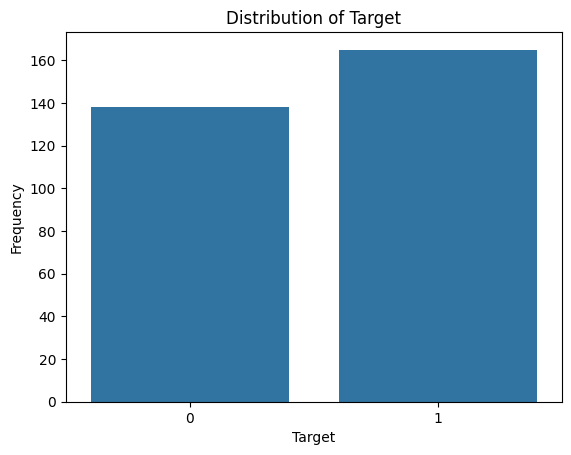

In [13]:
sns.countplot(data=df, x="target")  
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.title("Distribution of Target")
plt.show()

In [23]:
target_temp = df['target'].value_counts()
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("countHaveDisease: ",countHaveDisease,'\n', "countNoDisease: ",countNoDisease)


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46
countHaveDisease:  165 
 countNoDisease:  138


# We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

Analysing the 'Sex' feature

In [24]:
df["sex"].unique()

array([1, 0])

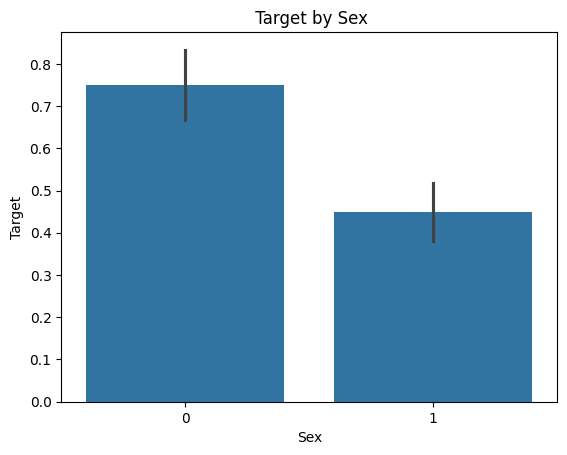

In [25]:
sns.barplot(x="sex", y="target", data=df)
plt.xlabel("Sex")
plt.ylabel("Target")
plt.title(" Target by Sex")
plt.show()

We notice, that females are more likely to have heart problems than males

Analysing the 'Chest Pain Type' feature

In [26]:
df['cp'].unique()

array([3, 2, 1, 0])

As expected, the CP feature has values from 0 to 3

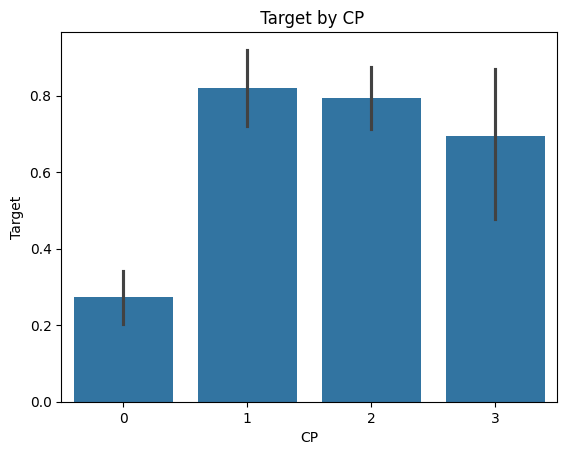

In [27]:
sns.barplot(x="cp", y="target", data=df)
plt.xlabel("CP")
plt.ylabel("Target")
plt.title(" Target by CP")
plt.show()

We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

Analysing the FBS feature

In [28]:
df["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [29]:
df['fbs'].unique()

array([1, 0])

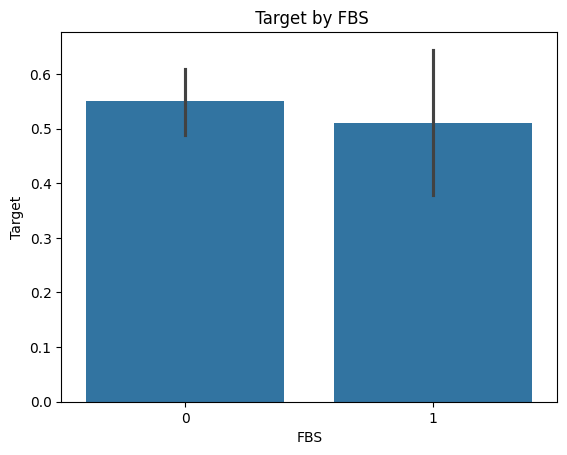

In [30]:
sns.barplot(x="fbs", y="target", data=df)
plt.xlabel("FBS")
plt.ylabel("Target")
plt.title(" Target by FBS")
plt.show()

Nothing extraordinary here

Analysing the restecg feature

In [31]:
df["restecg"].unique()

array([0, 1, 2])

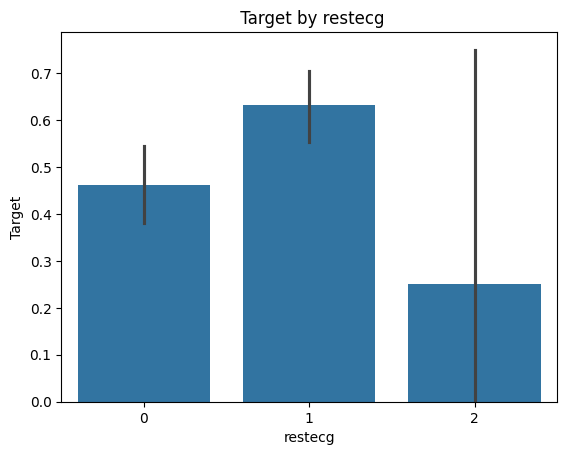

In [32]:
sns.barplot(x="restecg", y="target", data=df)
plt.xlabel("restecg")
plt.ylabel("Target")
plt.title(" Target by restecg")
plt.show()

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

Analysing the 'exang' feature

In [33]:
df['exang'].unique()

array([0, 1])

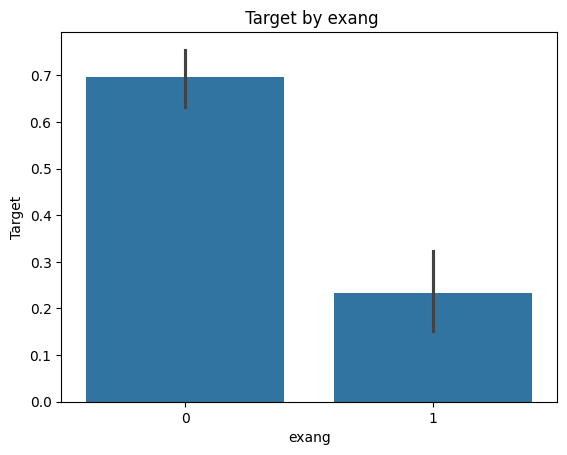

In [34]:
sns.barplot(x="exang", y="target", data=df)
plt.xlabel("exang")
plt.ylabel("Target")
plt.title(" Target by exang")
plt.show()

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

Analysing the Slope feature

In [35]:
df['slope'].unique()

array([0, 2, 1])

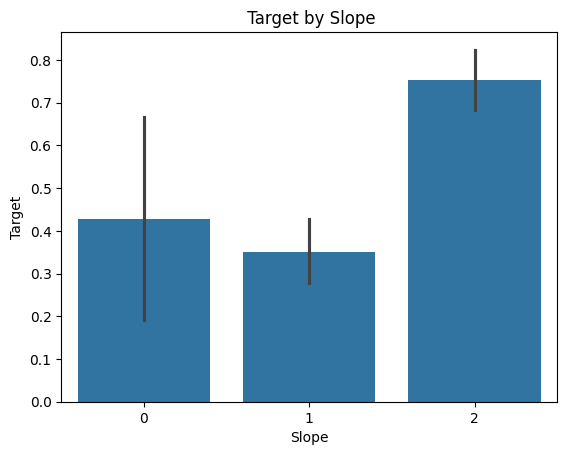

In [36]:
sns.barplot(x="slope", y="target", data=df)
plt.xlabel("Slope")
plt.ylabel("Target")
plt.title(" Target by Slope")
plt.show()

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

Analysing the 'ca' feature

#number of major vessels (0-3) colored by flourosopy

In [37]:
df["ca"].unique()

array([0, 2, 1, 3, 4])

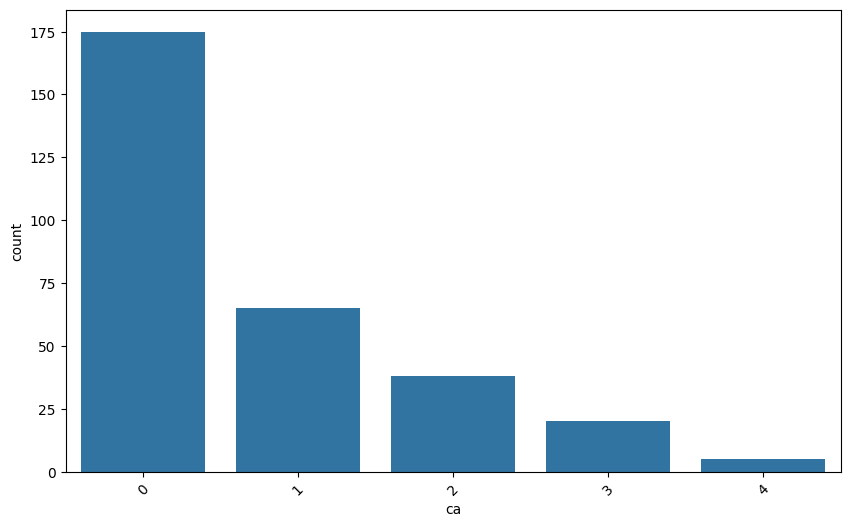

In [38]:
plt.figure(figsize=(10, 6))  
sns.countplot(x='ca', data=df)
plt.xticks(rotation=45)
plt.show()

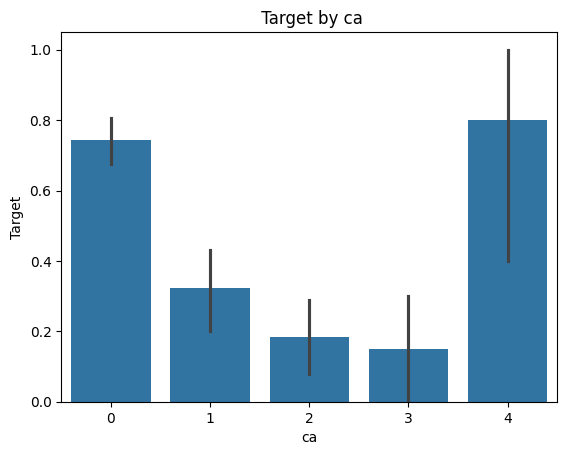

In [39]:
sns.barplot(x="ca", y="target", data=df)
plt.xlabel("ca")
plt.ylabel("Target")
plt.title(" Target by ca")
plt.show()

ca=4 has astonishingly large number of heart patients

In [40]:
### Analysing the 'thal' feature

In [41]:
df["thal"].unique()

array([1, 2, 3, 0])

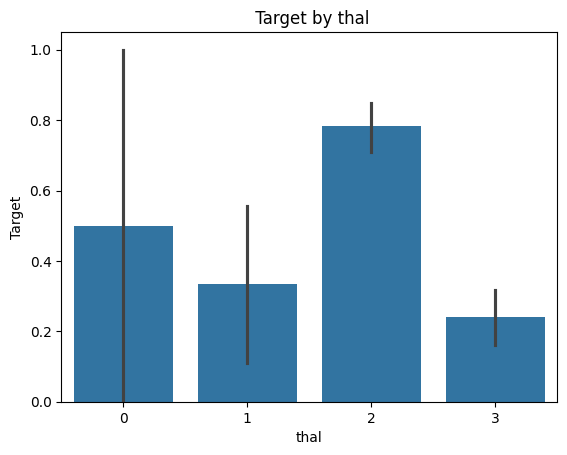

In [42]:
sns.barplot(x="thal", y="target", data=df)
plt.xlabel("thal")
plt.ylabel("Target")
plt.title(" Target by thal")
plt.show()

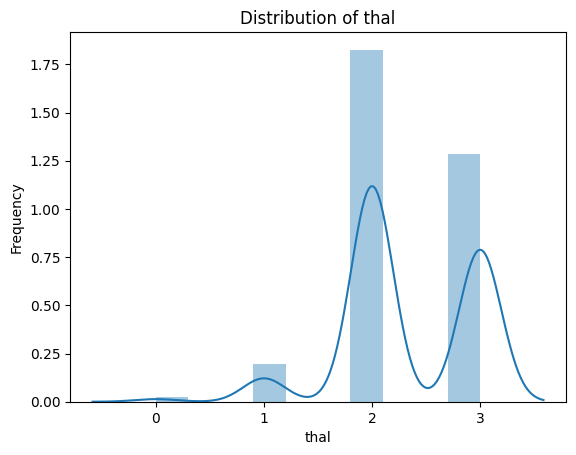

In [43]:
sns.distplot(df['thal'], bins=10, kde=True)  
plt.xlabel('thal')
plt.ylabel('Frequency')
plt.title('Distribution of thal')
plt.show()

# IV. Train Test split

In [45]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.30,random_state=0)

In [46]:
X_train.shape

(212, 13)

In [47]:
X_test.shape

(91, 13)

In [48]:
Y_train.shape

(212,)

In [49]:
Y_test.shape

(91,)

# V. Model Fitting

In [50]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [51]:
 pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [53]:
Y_pred_lr.shape

(91,)

In [54]:
cm = confusion_matrix(Y_test,Y_pred_lr)
print(cm)

[[33 11]
 [ 4 43]]


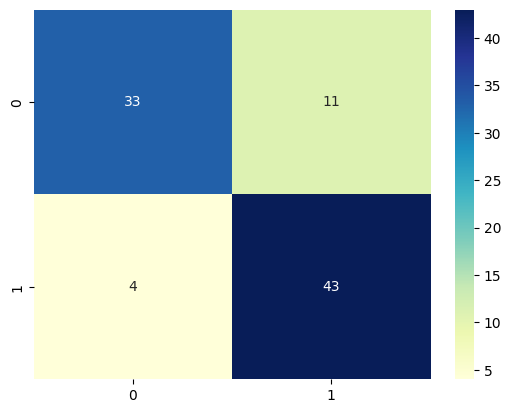

In [55]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [56]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 83.52 %


In [155]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [156]:
print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



# Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [99]:
print(Y_pred_dt.shape)

(91,)


In [100]:
cm = confusion_matrix(Y_test,Y_pred_dt)
print(cm)

[[33 11]
 [11 36]]


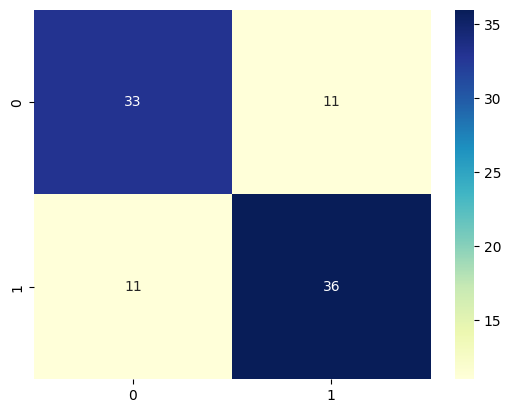

In [101]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [102]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 75.82 %


In [157]:
print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        44
           1       0.77      0.77      0.77        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [112]:
import graphviz
from sklearn import tree

In [114]:
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=predictors.columns,
                                class_names=['class_0', 'class_1'],  # Replace with your class labels
                                filled=True, rounded=True, special_characters=True)

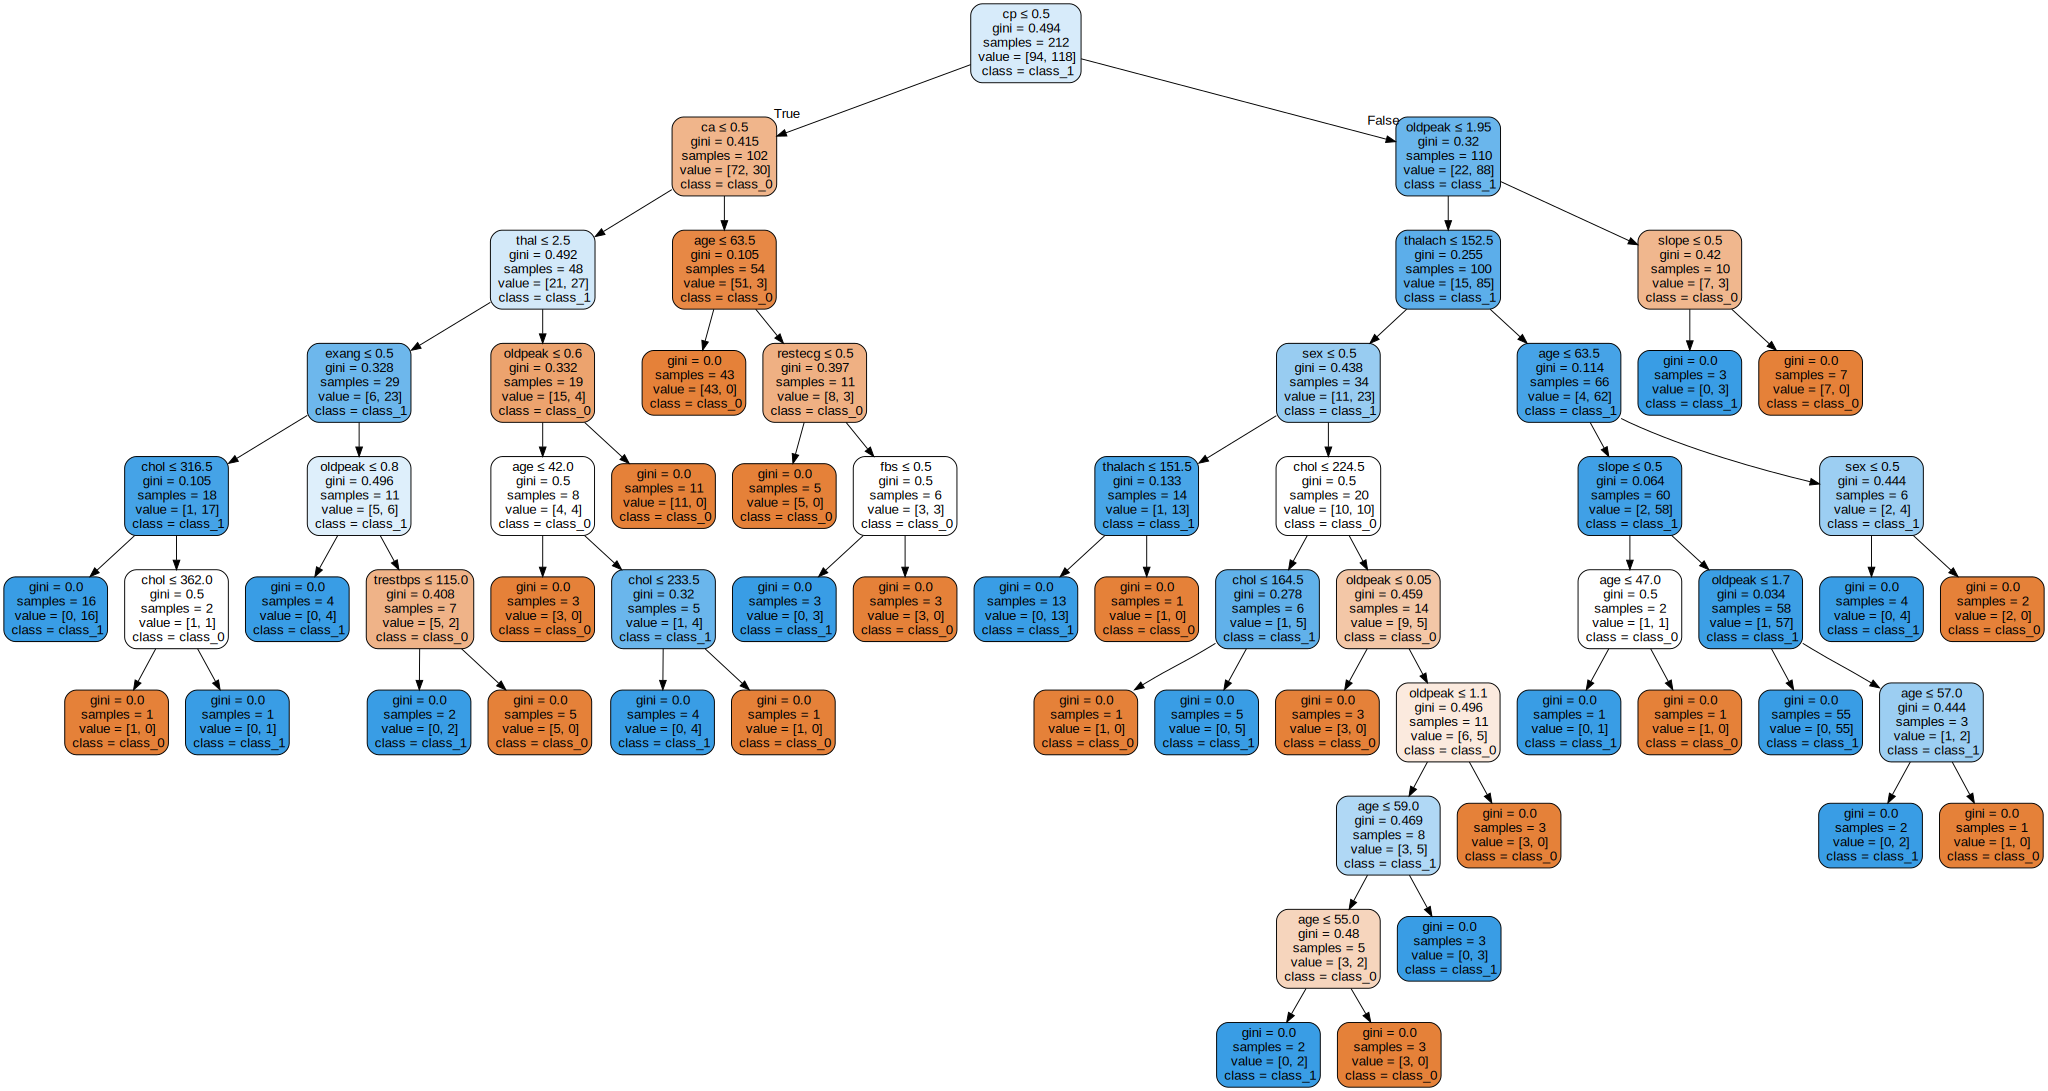

In [120]:
graph = graphviz.Source(dot_data)
graph
# graph.render("decision_tree_graph")
# graph.view("decision_tree_graph")

# Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [122]:
Y_pred_rf.shape

(91,)

In [123]:
cm = confusion_matrix(Y_test,Y_pred_rf)
print(cm)

[[37  7]
 [ 4 43]]


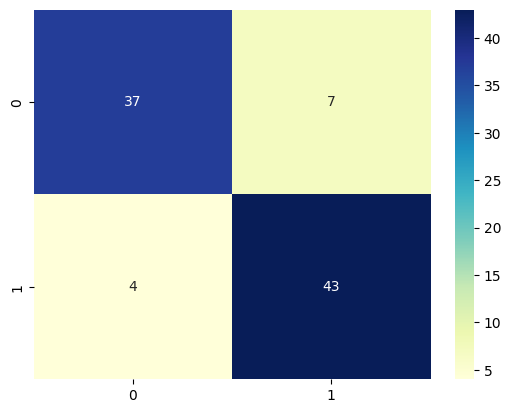

In [124]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [125]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 87.91 %


In [158]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        44
           1       0.86      0.91      0.89        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



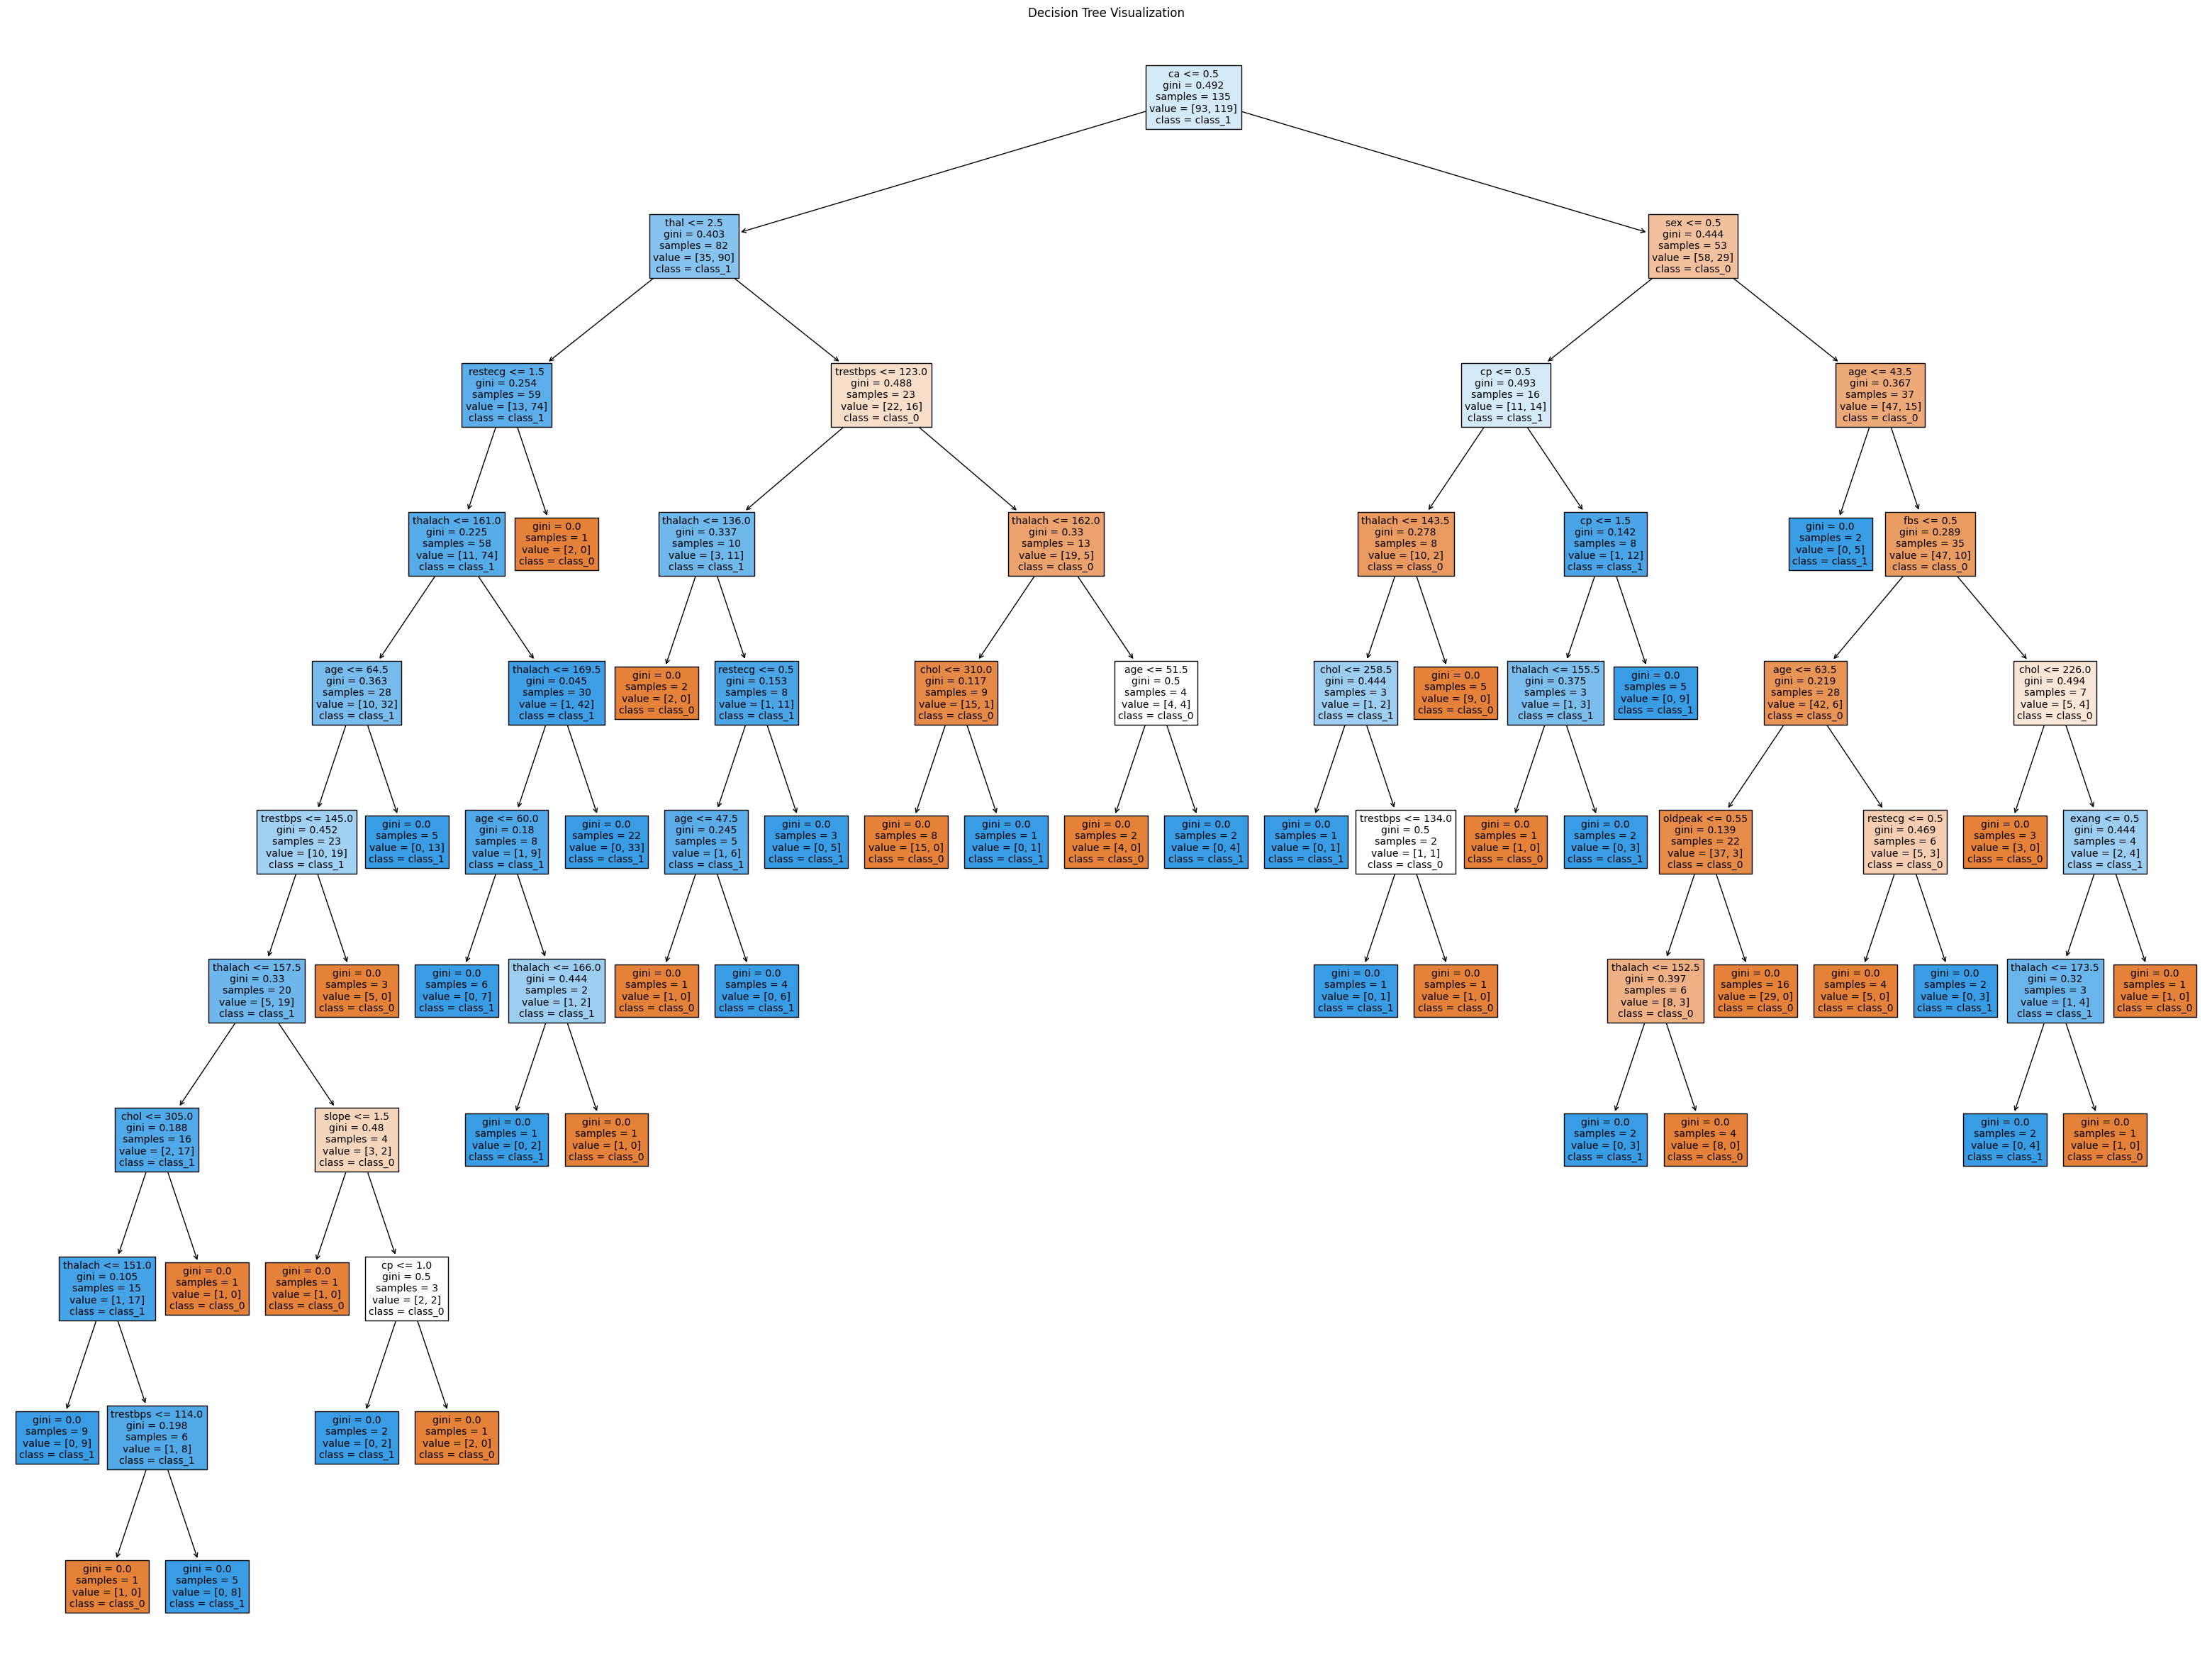

In [131]:
from sklearn.tree import plot_tree
tree_to_visualize = rf.estimators_[0]

# Plot the chosen decision tree
plt.figure(figsize=(40, 30))
plot_tree(tree_to_visualize, filled=True, feature_names=predictors.columns, class_names=['class_0', 'class_1'])
plt.title("Decision Tree Visualization")
plt.show()

# Naive Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [133]:
Y_pred_nb.shape

(91,)

In [139]:
cm = confusion_matrix(Y_test,Y_pred_nb)
print(cm)

[[32 12]
 [ 6 41]]


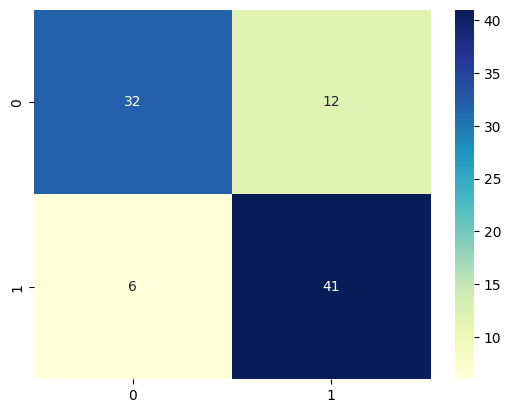

In [140]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [136]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 80.22 %


In [159]:
print(classification_report(Y_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



# SVM

In [137]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [138]:
Y_pred_svm.shape

(91,)

In [141]:
cm = confusion_matrix(Y_test,Y_pred_svm)
print(cm)

[[32 12]
 [ 5 42]]


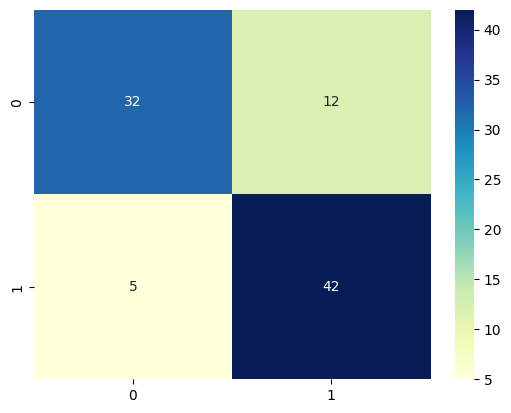

In [142]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [143]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.32 %


In [160]:
print(classification_report(Y_test, Y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



# K Nearest Neighbors

In [144]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [145]:
Y_pred_knn.shape

(91,)

In [146]:
cm = confusion_matrix(Y_test,Y_pred_knn)
print(cm)

[[28 16]
 [12 35]]


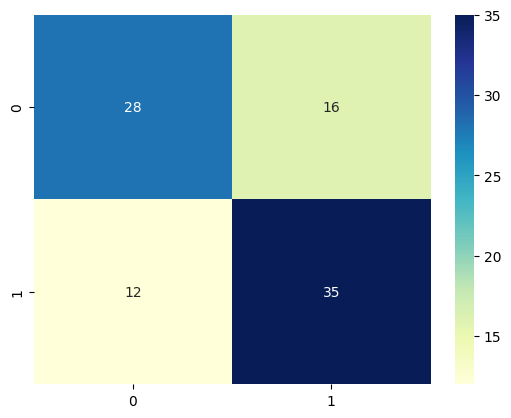

In [147]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [148]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 69.23 %


In [161]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        44
           1       0.69      0.74      0.71        47

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.69      0.69      0.69        91



# XGBoost

In [149]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [150]:
Y_pred_xgb.shape

(91,)

In [151]:
cm = confusion_matrix(Y_test,Y_pred_xgb)
print(cm)

[[32 12]
 [ 6 41]]


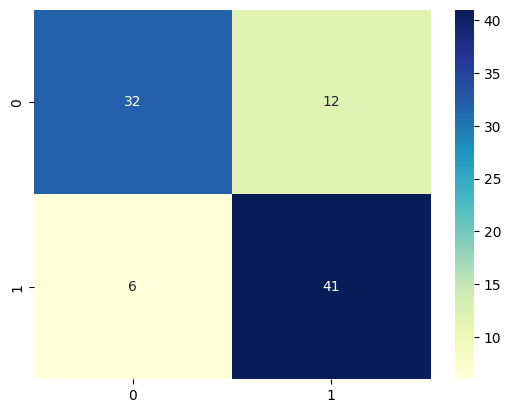

In [152]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [153]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 80.22 %


In [162]:
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



# Output final score

In [154]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 83.52 %
The accuracy score achieved using Naive Bayes is: 80.22 %
The accuracy score achieved using Support Vector Machine is: 81.32 %
The accuracy score achieved using K-Nearest Neighbors is: 69.23 %
The accuracy score achieved using Decision Tree is: 75.82 %
The accuracy score achieved using Random Forest is: 87.91 %
The accuracy score achieved using XGBoost is: 80.22 %


# random forest has good result as compare to other algorithms